In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [51]:
df=pd.read_csv('abalone.data.csv')

In [52]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,NaN,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,NaN,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,NaN,7


In [30]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4175.000000,4177.000000,4174.000000,4177.000000
mean,0.523998,0.407865,0.139520,0.828716,0.359465,0.180594,0.238877,9.933684
std,0.120107,0.099246,0.041831,0.490445,0.221967,0.109614,0.139211,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [31]:
df.shape

(4177, 9)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4174 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [33]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [34]:
df.isnull().sum()

Sex               0
Length            1
Diameter          1
Height            1
Whole weight      1
Shucked weight    2
Viscera weight    0
Shell weight      3
Rings             0
dtype: int64

In [35]:
df[df.isnull()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df.mean(numeric_only=True)

Length            0.523998
Diameter          0.407865
Height            0.139520
Whole weight      0.828716
Shucked weight    0.359465
Viscera weight    0.180594
Shell weight      0.238877
Rings             9.933684
dtype: float64

# *REPLACING NULL VALUES*

In [54]:
df.fillna(value=df.mean(numeric_only=True), inplace=True)
df

#----------------------------------------------------------------------
# mean = df['Rings'].mean()
# rounded_mean = np.ceil(mean)
# df.fillna(rounded_mean, inplace=True)
# df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.09500,0.5140,0.2245,0.1010,0.238877,15
1,M,0.350,0.265,0.09000,0.2255,0.0995,0.0485,0.070000,7
2,F,0.530,0.420,0.13500,0.6770,0.2565,0.1415,0.210000,9
3,M,0.440,0.365,0.13952,0.5160,0.2155,0.1140,0.155000,10
4,I,0.330,0.255,0.08000,0.2050,0.0895,0.0395,0.238877,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.16500,0.8870,0.3700,0.2390,0.249000,11
4173,M,0.590,0.440,0.13500,0.9660,0.4390,0.2145,0.260500,10
4174,M,0.600,0.475,0.20500,1.1760,0.5255,0.2875,0.308000,9
4175,F,0.625,0.485,0.15000,1.0945,0.5310,0.2610,0.296000,10


# *REPLACING VALUES OF COLUMN "SEX"*

In [55]:
df["Sex"] = df["Sex"].map({"M":1, "F":0, "I":3})
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.09500,0.5140,0.2245,0.1010,0.238877,15
1,1,0.350,0.265,0.09000,0.2255,0.0995,0.0485,0.070000,7
2,0,0.530,0.420,0.13500,0.6770,0.2565,0.1415,0.210000,9
3,1,0.440,0.365,0.13952,0.5160,0.2155,0.1140,0.155000,10
4,3,0.330,0.255,0.08000,0.2050,0.0895,0.0395,0.238877,7


# *****************************************************************************************

# *DATA PREPROCESSING*

# *PAIR PLOT*

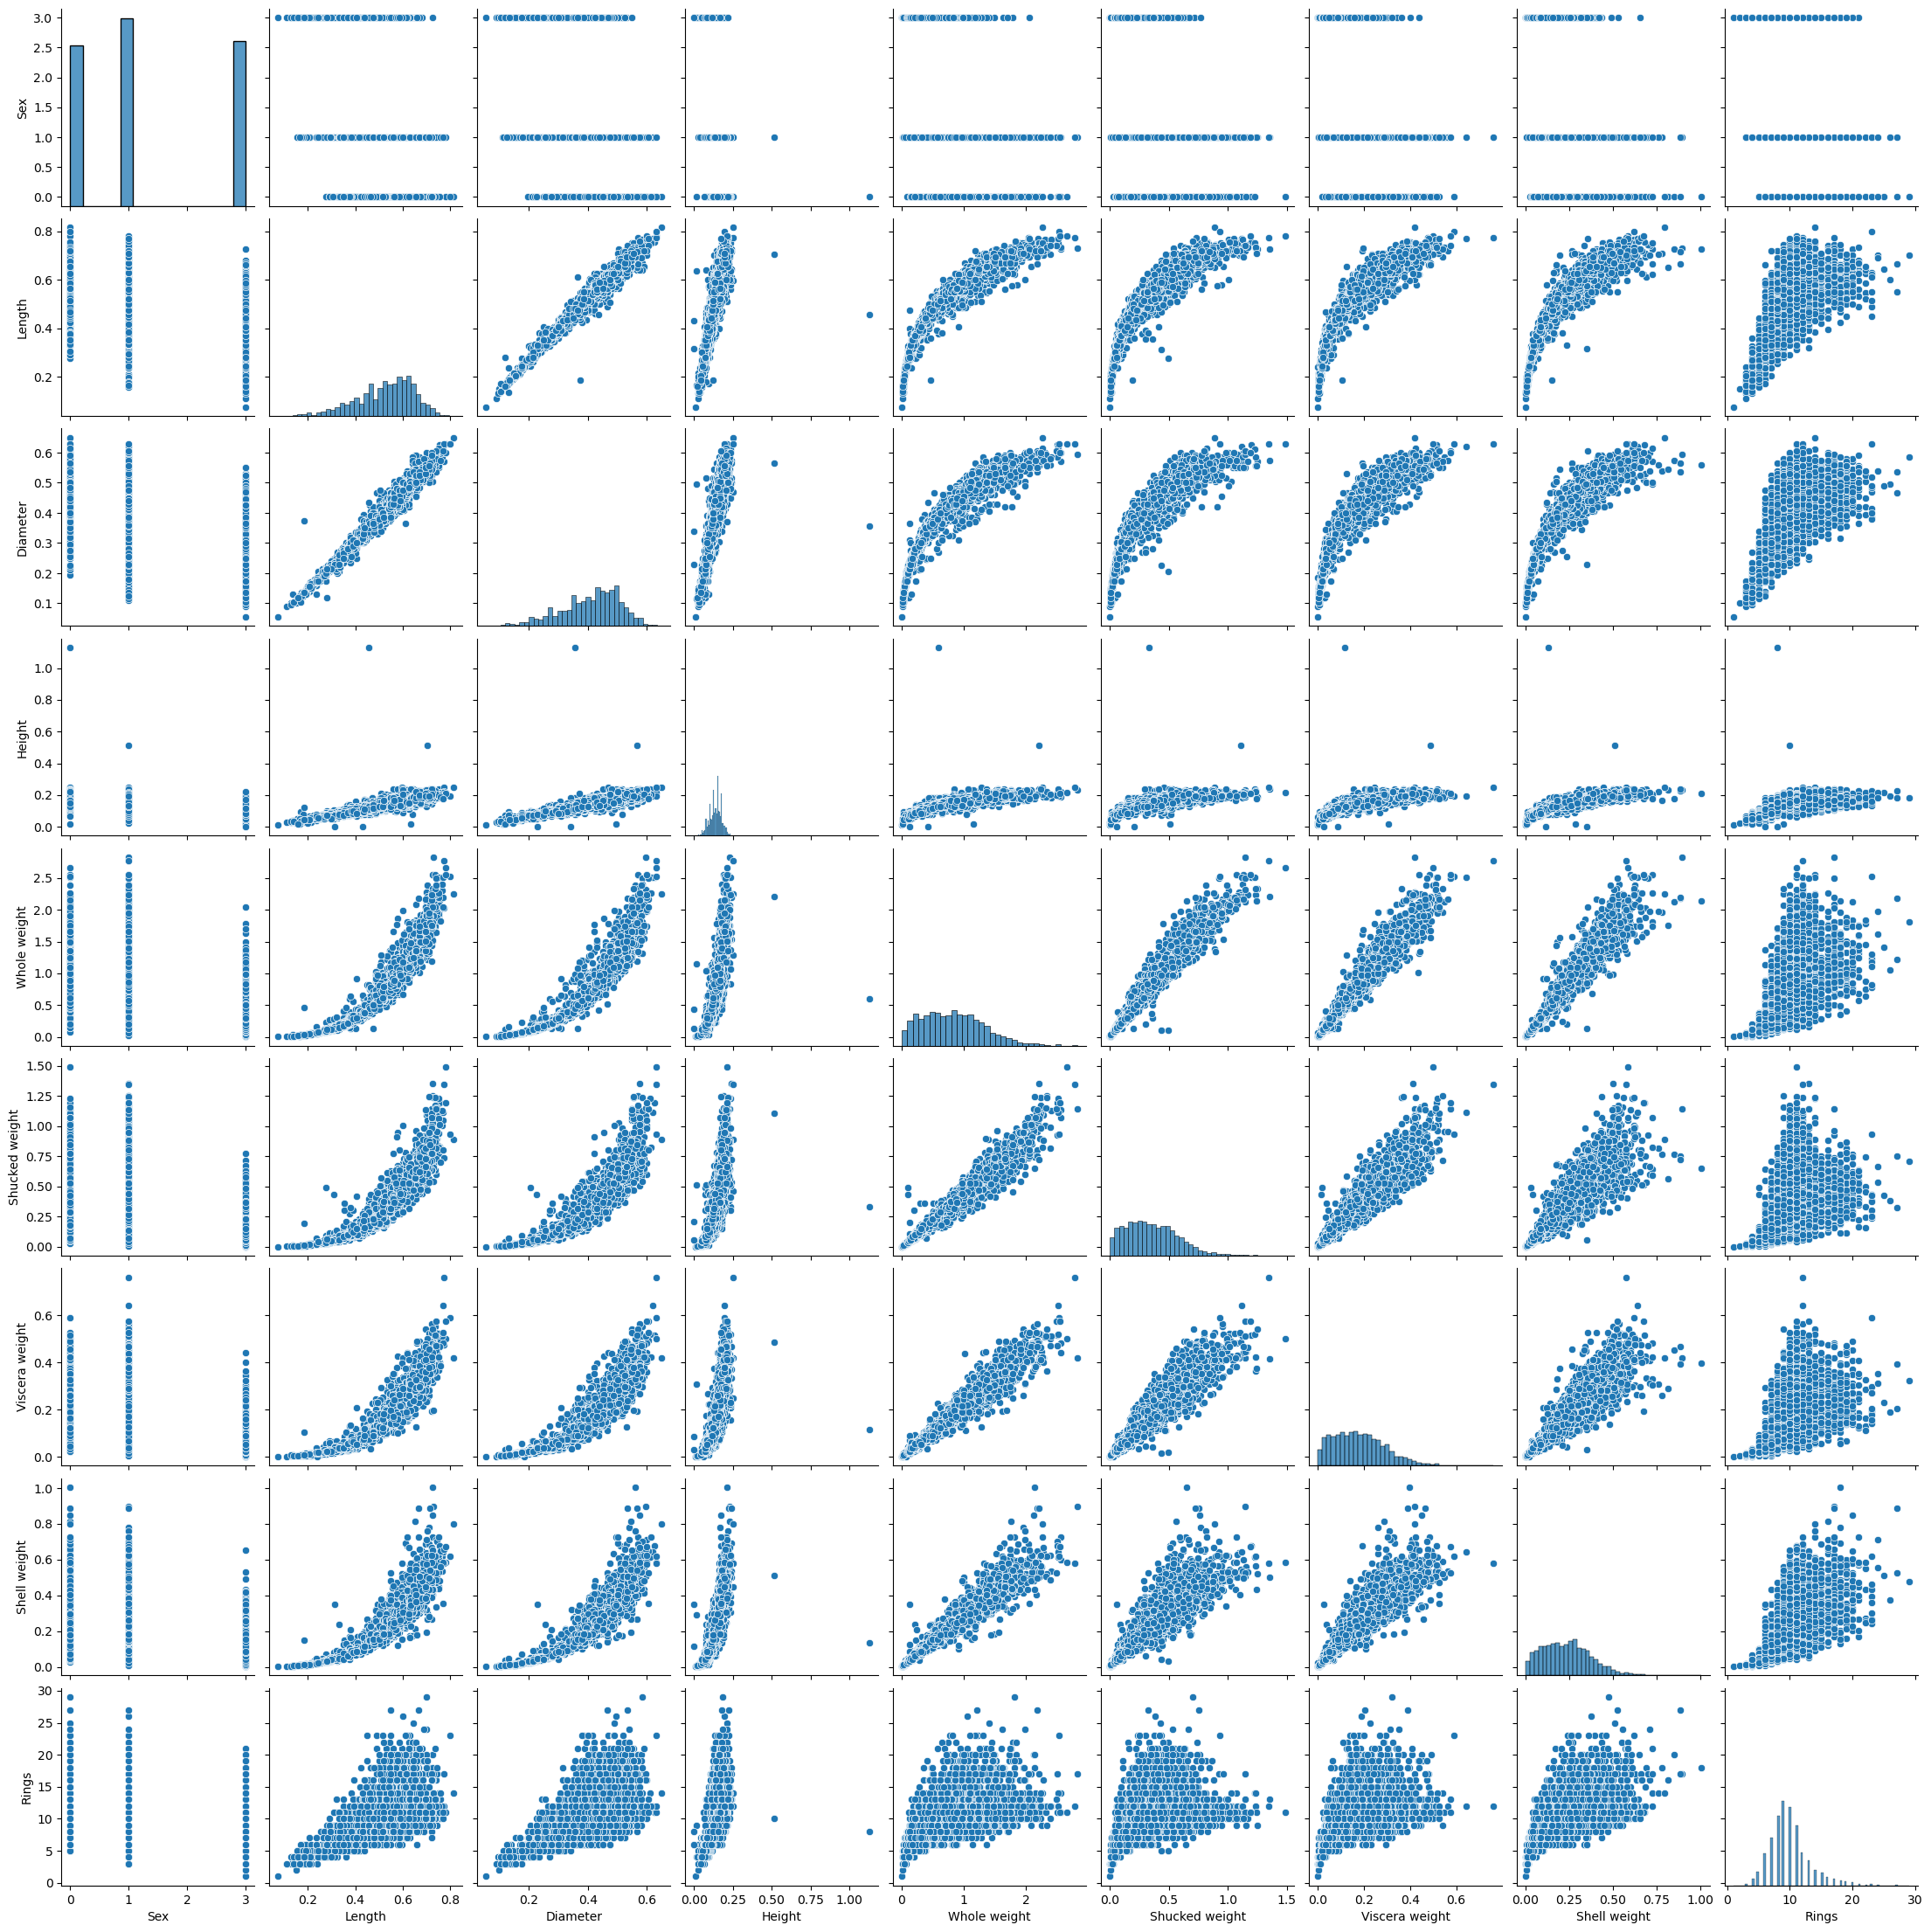

In [25]:
sns.pairplot(df)

# *SCATTER PLOTS*

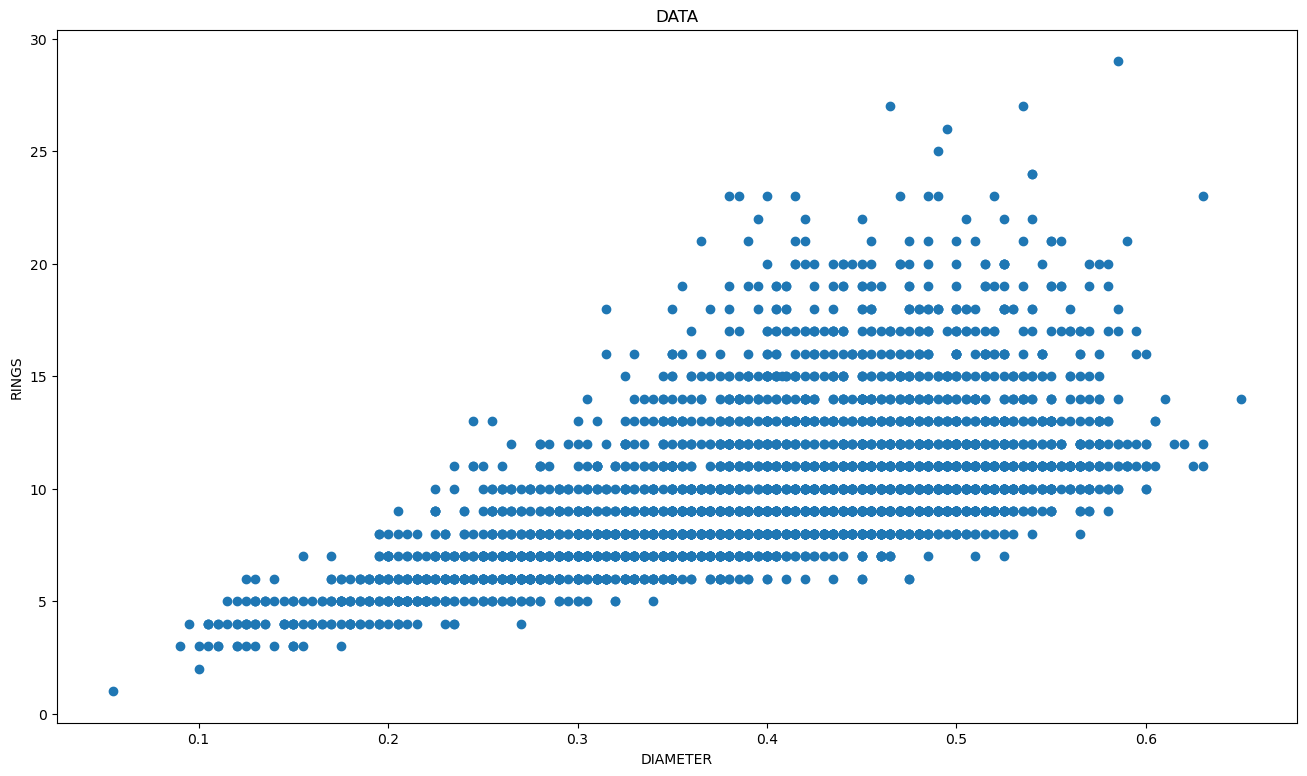

In [11]:
x = df['Diameter']
y = df['Rings']

plt.figure(figsize=(16,9))
plt.title('DATA')
plt.xlabel('DIAMETER')
plt.ylabel('RINGS')
plt.scatter(x,y)

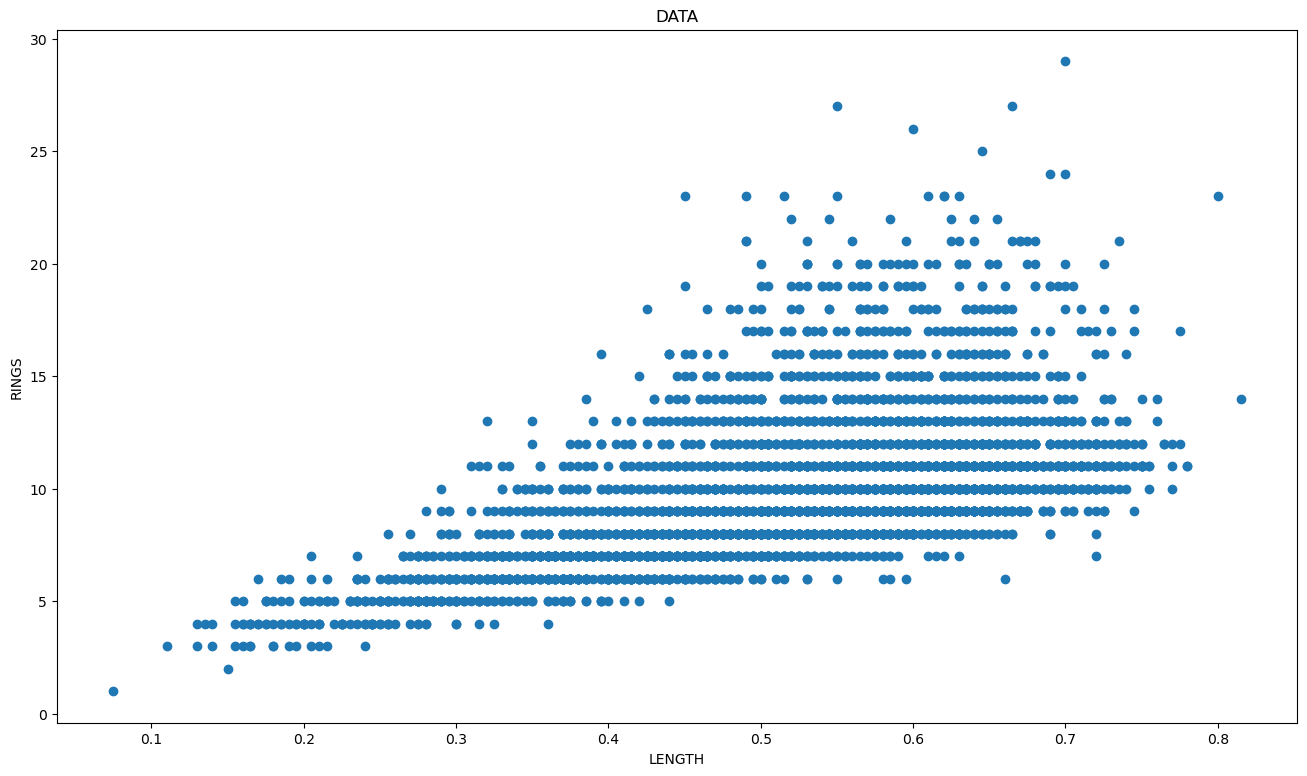

In [13]:
x = df['Length']
y = df['Rings']

plt.figure(figsize=(16,9))
plt.title('DATA')
plt.xlabel('LENGTH')
plt.ylabel('RINGS')
plt.scatter(x,y)

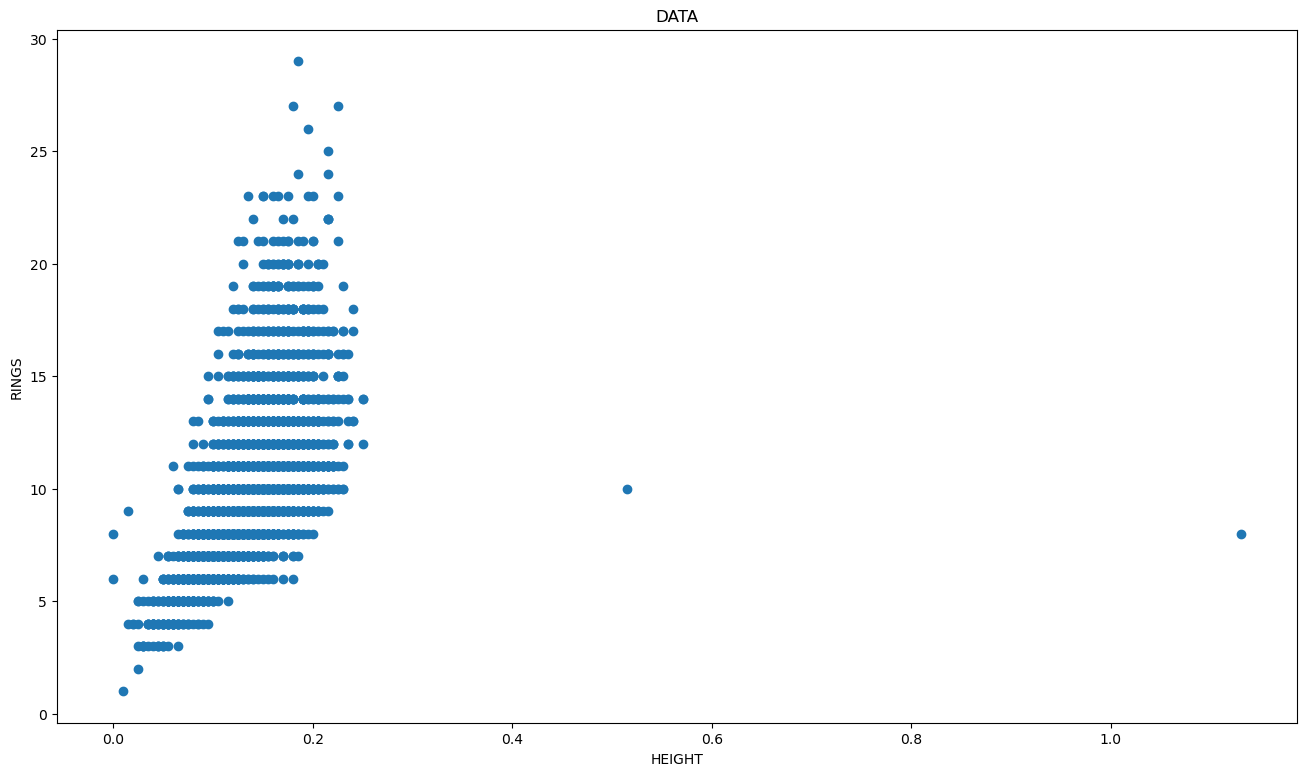

In [28]:
x = df['Height']
y = df['Rings']

plt.figure(figsize=(16,9))
plt.title('DATA')
plt.xlabel('HEIGHT')
plt.ylabel('RINGS')
plt.scatter(x,y)

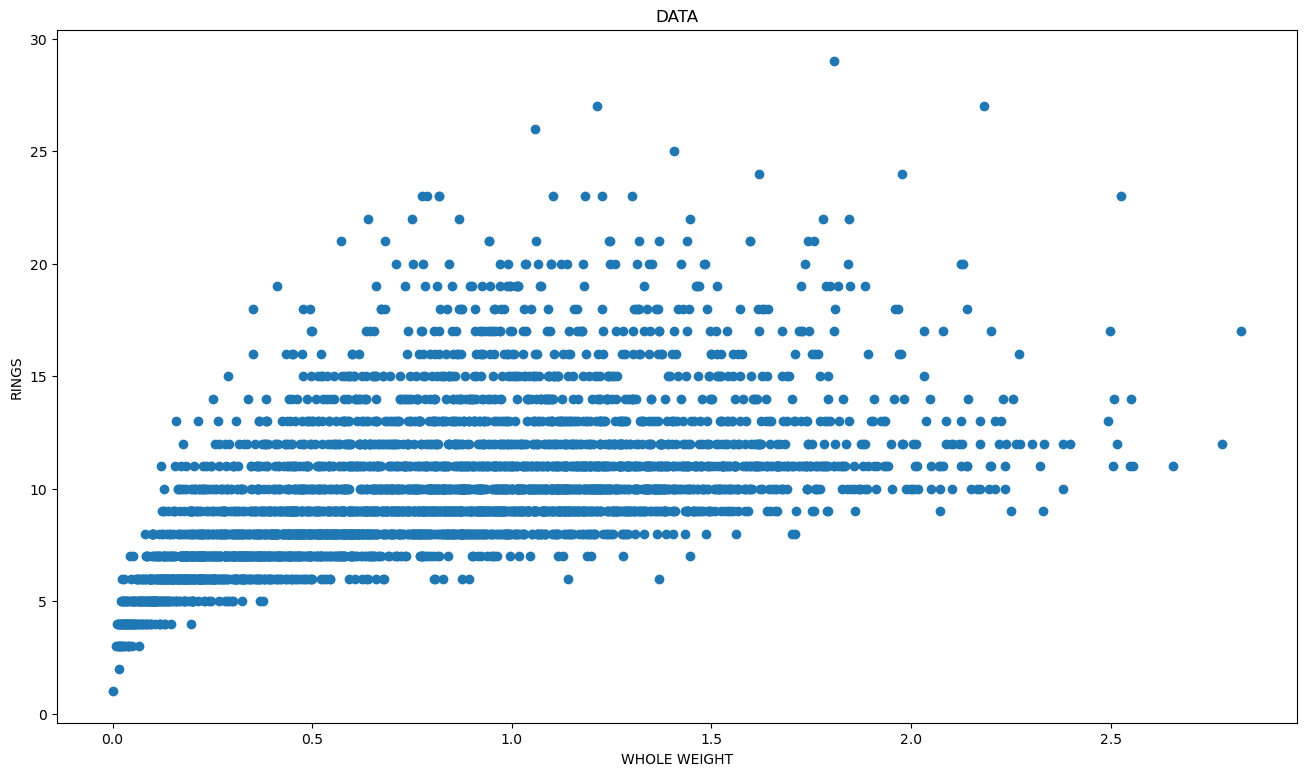

In [29]:
x = df['Whole weight']
y = df['Rings']

plt.figure(figsize=(16,9))
plt.title('DATA')
plt.xlabel('WHOLE WEIGHT')
plt.ylabel('RINGS')
plt.scatter(x,y)

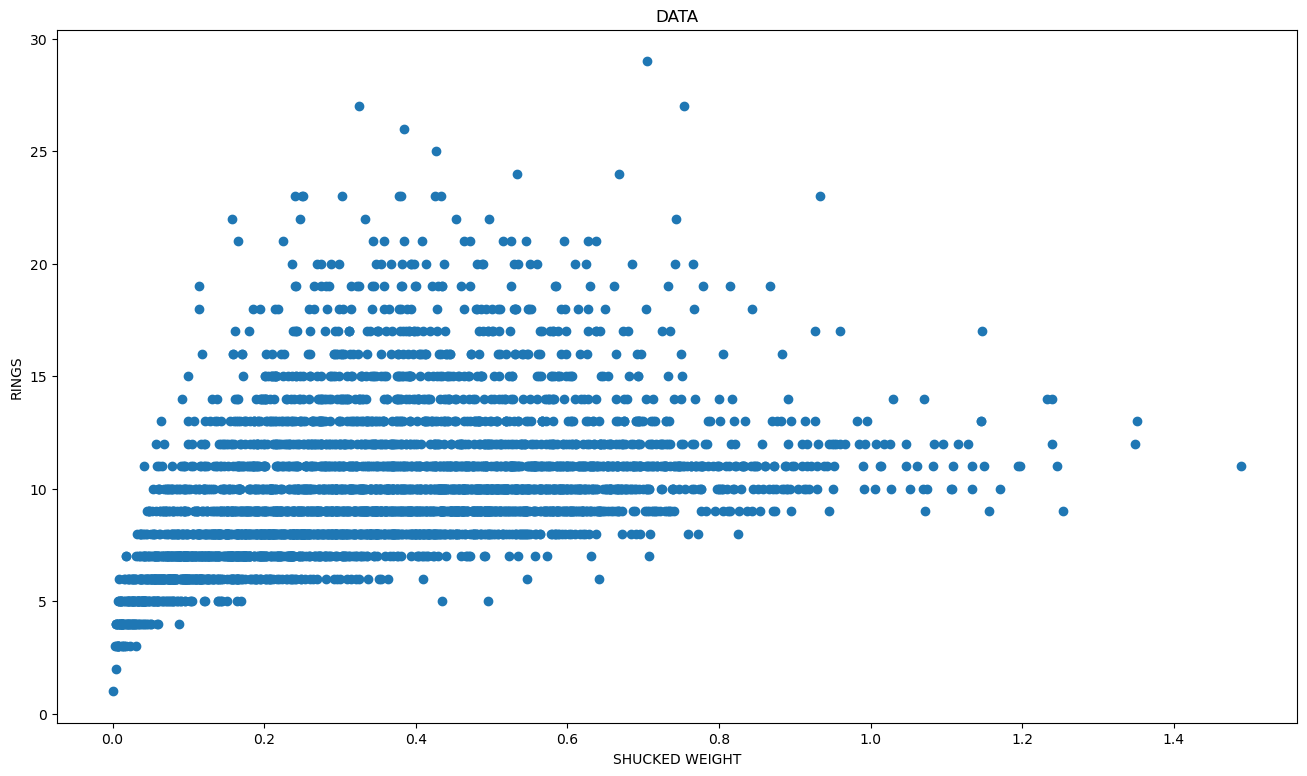

In [30]:
x = df['Shucked weight']
y = df['Rings']

plt.figure(figsize=(16,9))
plt.title('DATA')
plt.xlabel('SHUCKED WEIGHT')
plt.ylabel('RINGS')
plt.scatter(x,y)

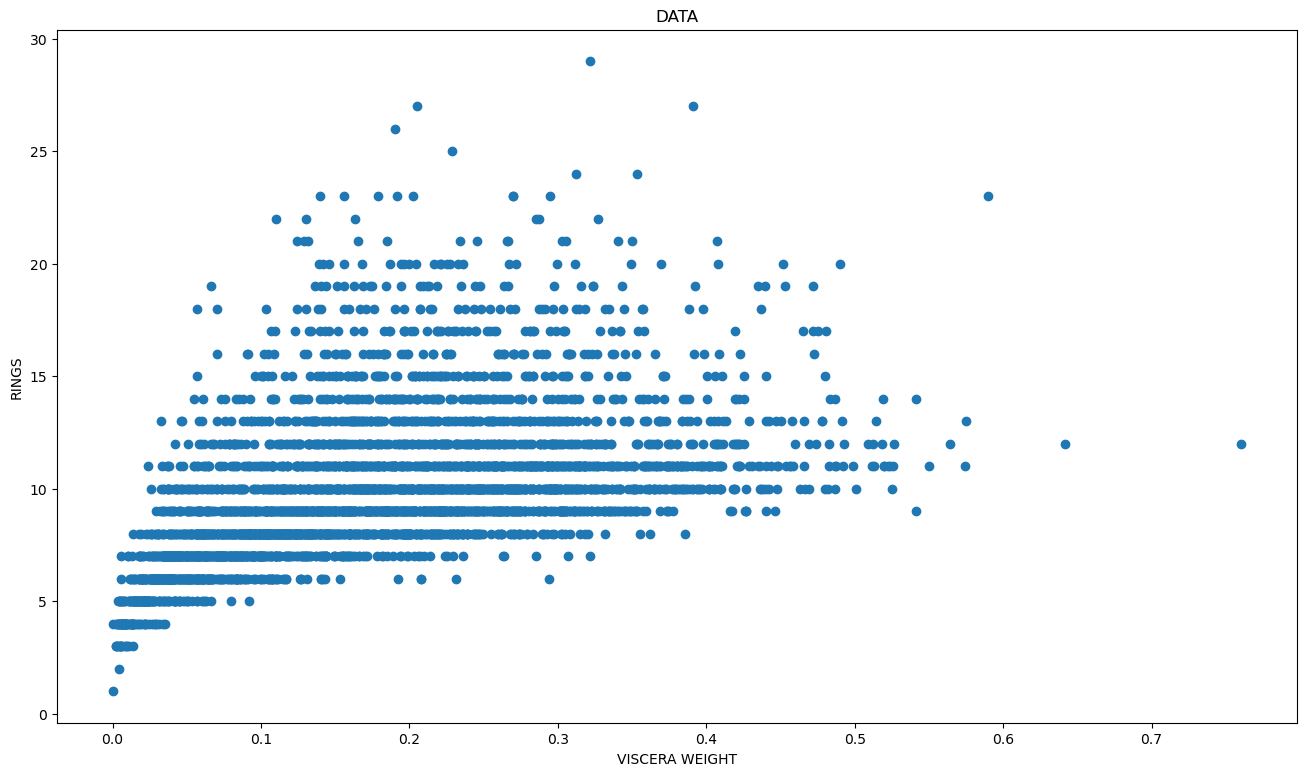

In [31]:
x = df['Viscera weight']
y = df['Rings']

plt.figure(figsize=(16,9))
plt.title('DATA')
plt.xlabel('VISCERA WEIGHT')
plt.ylabel('RINGS')
plt.scatter(x,y)

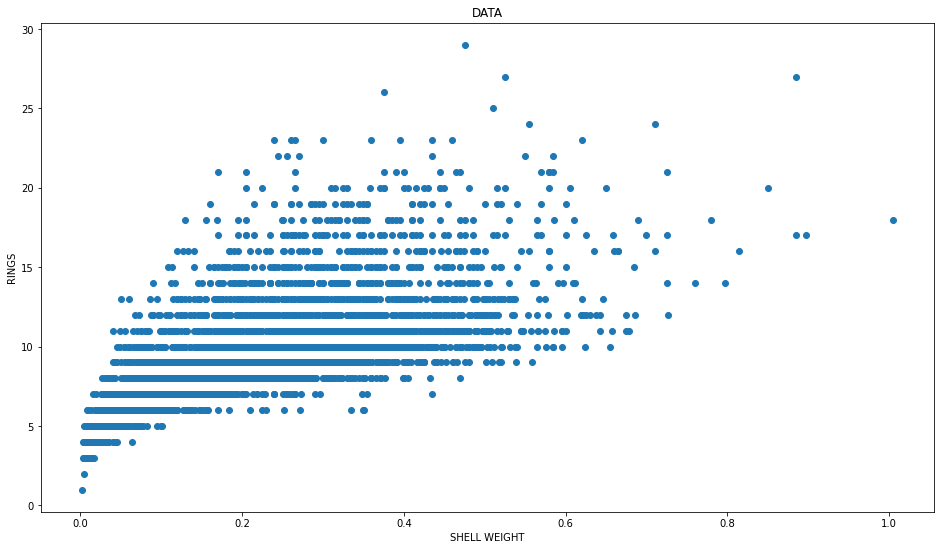

In [136]:
x = df['Shell weight']
y = df['Rings']

plt.figure(figsize=(16,9))
plt.title('DATA')
plt.xlabel('SHELL WEIGHT')
plt.ylabel('RINGS')
plt.scatter(x,y)

# *CORRELATION MATRIX*

C:\Users\thite\AppData\Local\Temp\ipykernel_11156\4103911317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


<Axes: >

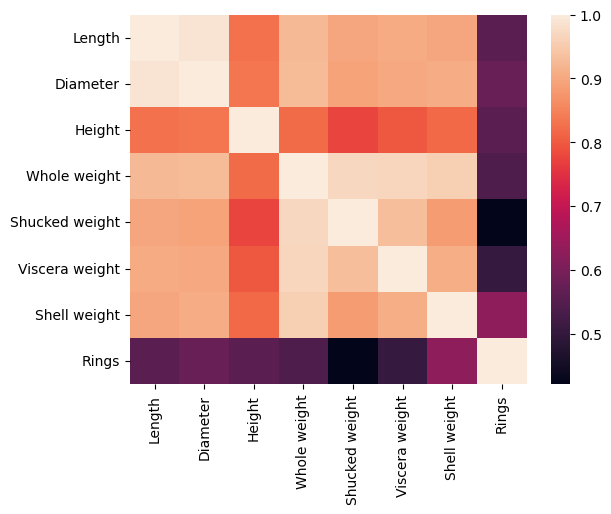

In [10]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix)

<Axes: >

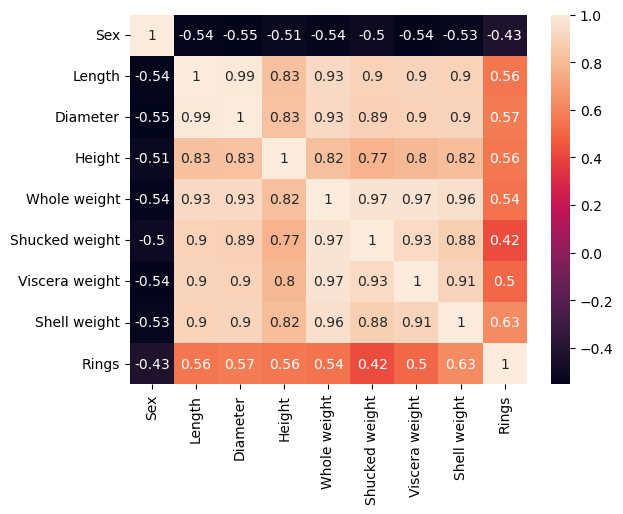

In [18]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

# BAR GRAPH

<Axes: >

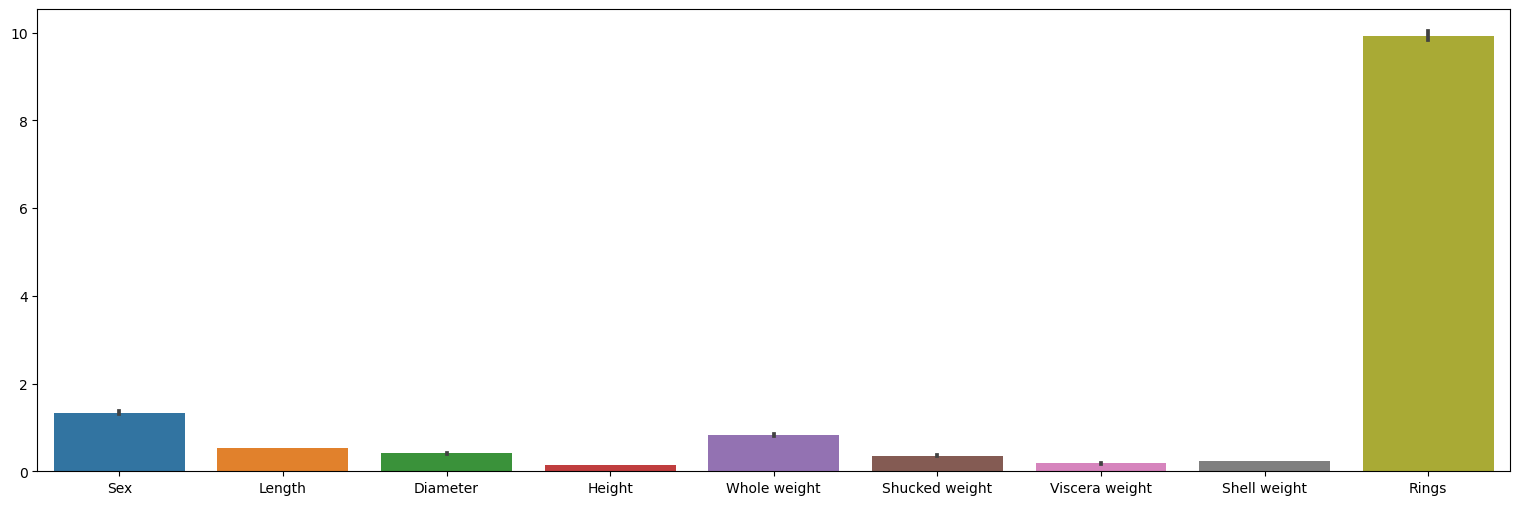

In [30]:
plt.figure(figsize = (19,6))
sns.barplot(df)

# KERNEL DENSITY

<Axes: ylabel='Density'>

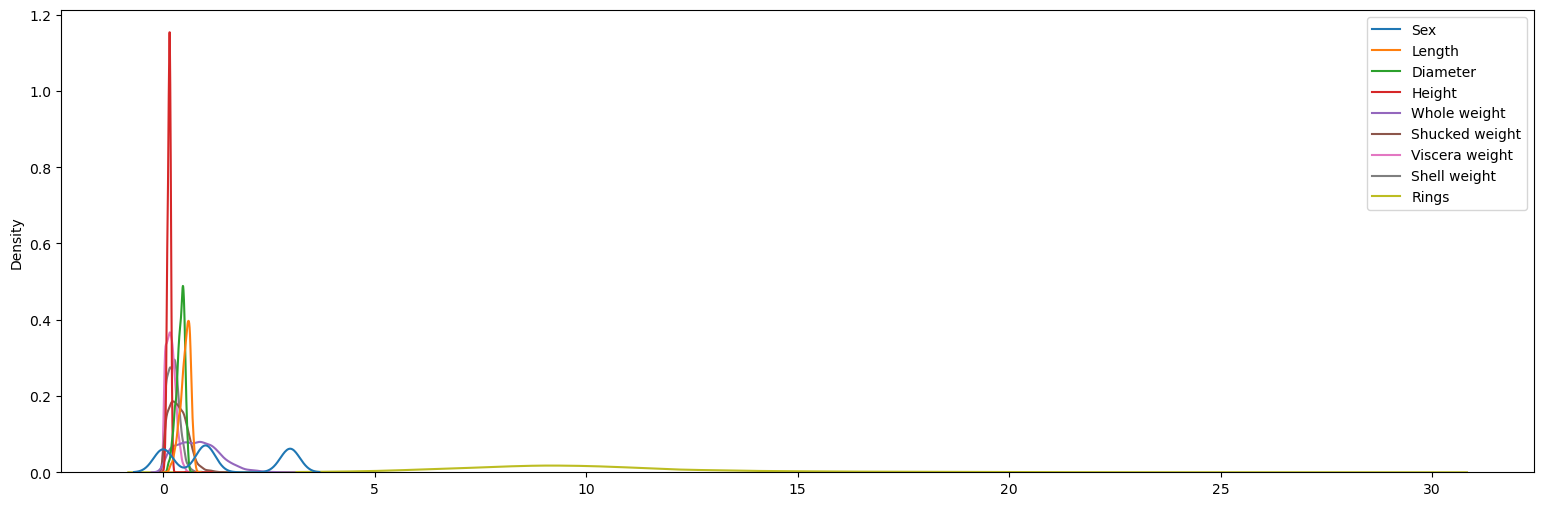

In [33]:
plt.figure(figsize = (19,6))
sns.kdeplot(df)

# *BOX PLOT*

<Axes: xlabel='Shell weight', ylabel='Rings'>

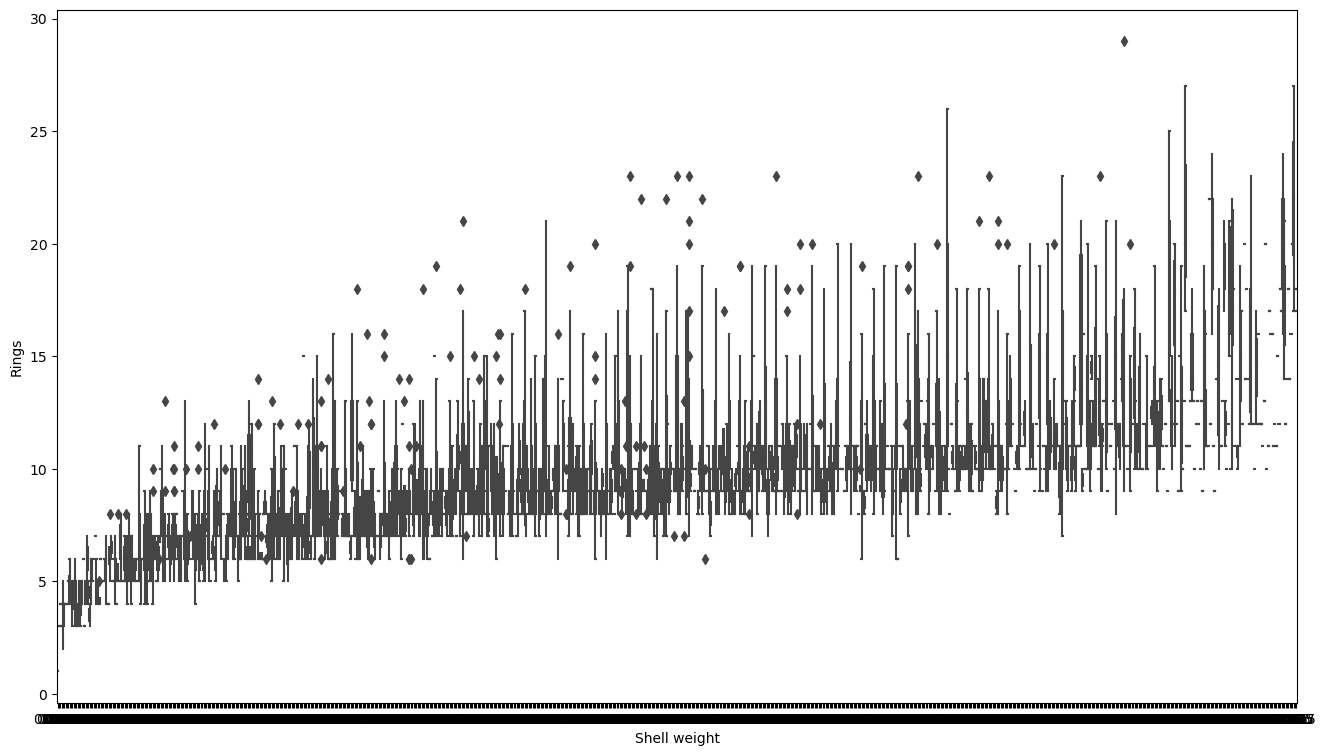

In [26]:
plt.figure(figsize=(16,9))
plt.xlabel('Shell Weight')
plt.ylabel('Rings')
sns.boxplot(x=df['Shell weight'],y=df['Rings'])

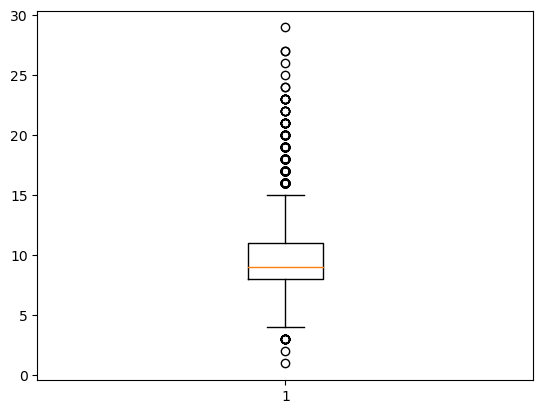

In [39]:
plt.boxplot(df.Rings)
plt.show()

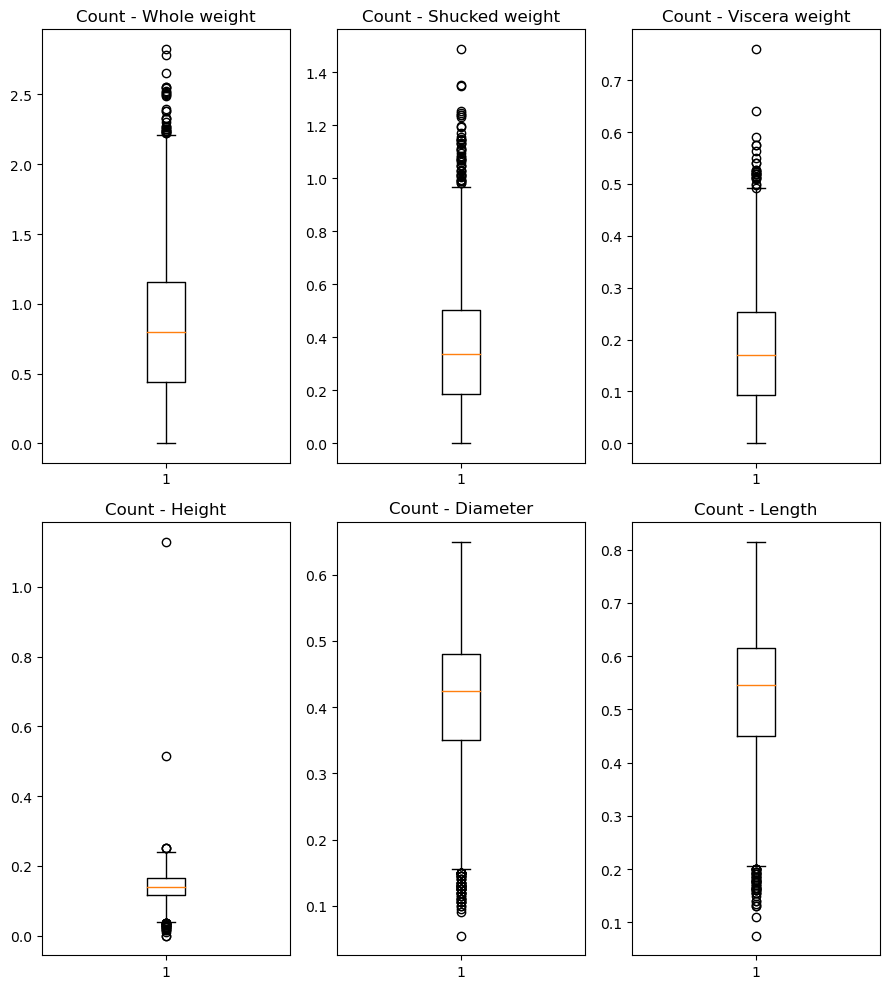

In [40]:
plt.figure(figsize=(9, 10))

plt.subplot(2, 3, 1)  # 2 rows, 3 columns, position
plt.boxplot(df["Whole weight"])
plt.title('Count - Whole weight')

plt.subplot(2, 3, 2)  
plt.boxplot(df["Shucked weight"])
plt.title('Count - Shucked weight')

plt.subplot(2, 3, 3) 
plt.boxplot(df["Viscera weight"])
plt.title('Count - Viscera weight')

plt.subplot(2, 3, 4)  
plt.boxplot(df["Height"])
plt.title('Count - Height')

plt.subplot(2, 3, 5)  
plt.boxplot(df["Diameter"])
plt.title('Count - Diameter')

plt.subplot(2, 3, 6)  
plt.boxplot(df["Length"])
plt.title('Count - Length')


plt.tight_layout()
plt.show()

# *BAR GRAPH*

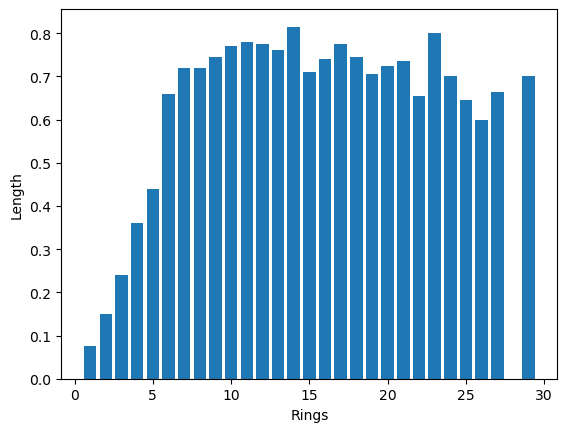

In [41]:
plt.bar(df.Rings, df.Length)
plt.ylabel("Length")
plt.xlabel("Rings")
plt.show()

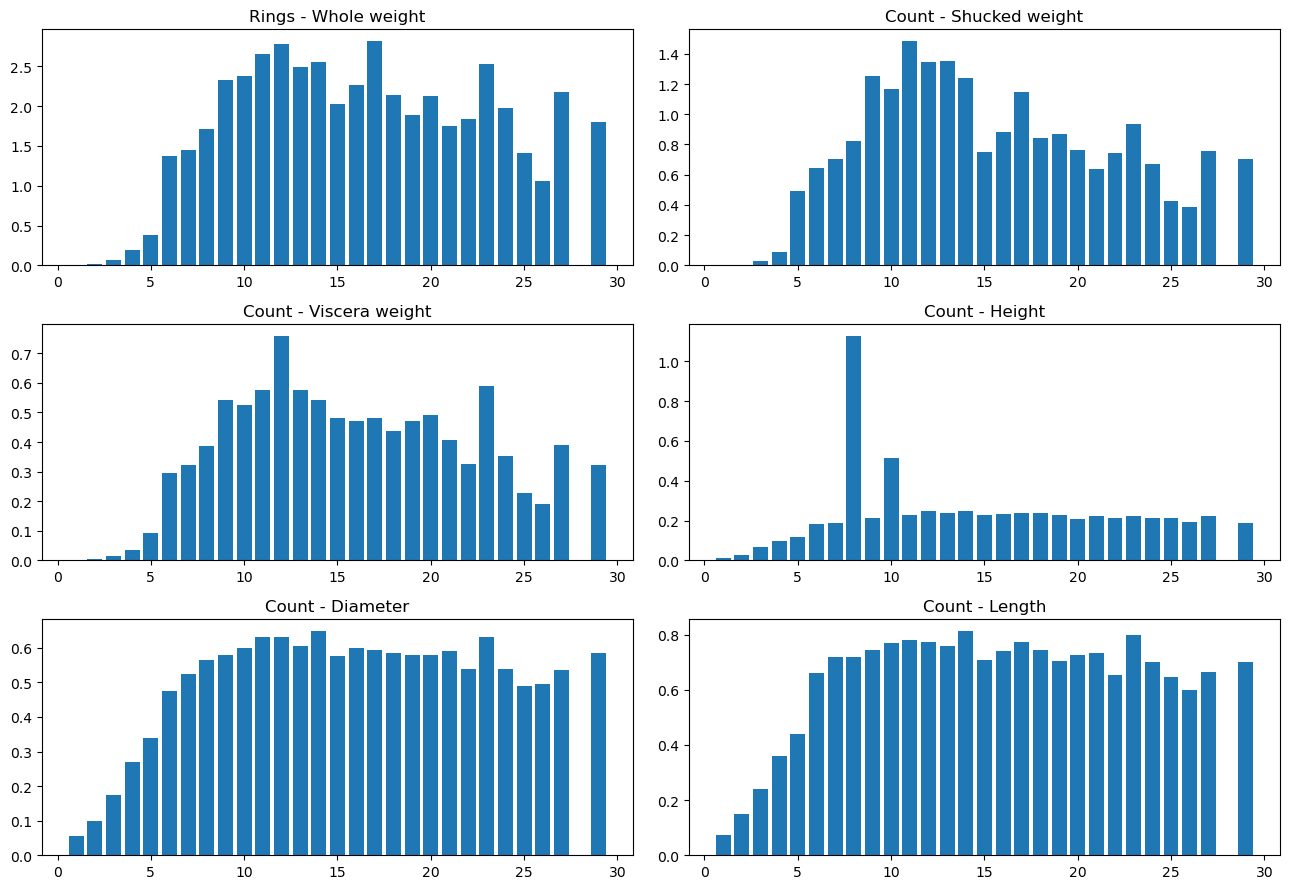

In [42]:
plt.figure(figsize=(13, 9))

plt.subplot(3, 2, 1)  # 3 rows, 2 columns, position
plt.bar(df.Rings, df["Whole weight"])
plt.title('Rings - Whole weight')

plt.subplot(3, 2, 2)  
plt.bar(df.Rings, df["Shucked weight"])
plt.title('Count - Shucked weight')

plt.subplot(3, 2, 3) 
plt.bar(df.Rings, df["Viscera weight"])
plt.title('Count - Viscera weight')

plt.subplot(3, 2, 4)  
plt.bar(df.Rings, df["Height"])
plt.title('Count - Height')

plt.subplot(3, 2, 5)  
plt.bar(df.Rings, df["Diameter"])
plt.title('Count - Diameter')

plt.subplot(3, 2, 6)  
plt.bar(df.Rings, df["Length"])
plt.title('Count - Length')


plt.tight_layout()
plt.show()

# *PIE CHART*

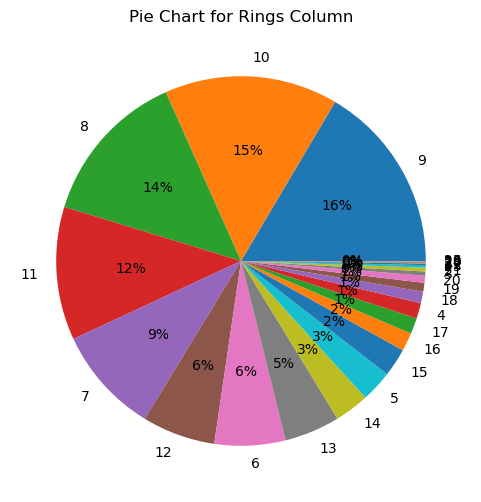

In [9]:
# labels for data
keys = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

value_counts = df['Rings'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%.0f%%')
plt.title('Pie Chart for Rings Column') 
plt.show()




#--------------------------------------------------------------------------------------------------------------------------------
#rings_column = df['Rings']
#value_counts = rings_column.value_counts()


#plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')


# *HISTOGRAPH*

<Axes: ylabel='Count'>

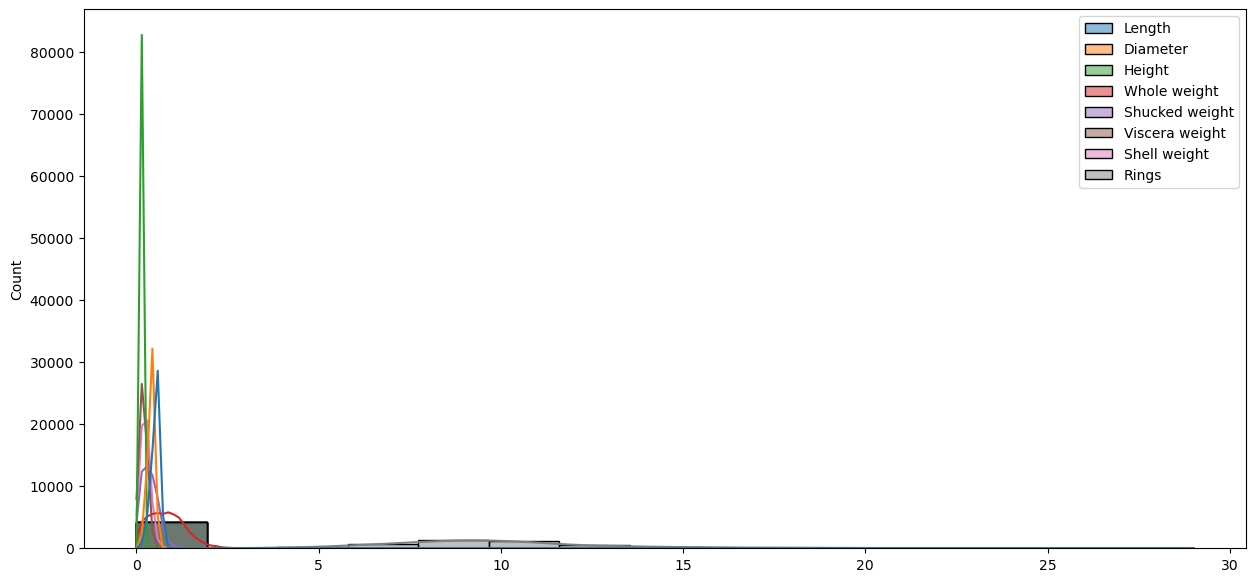

In [7]:
plt.figure(figsize=(15, 7))
sns.histplot(df ,kde=True,bins=15)

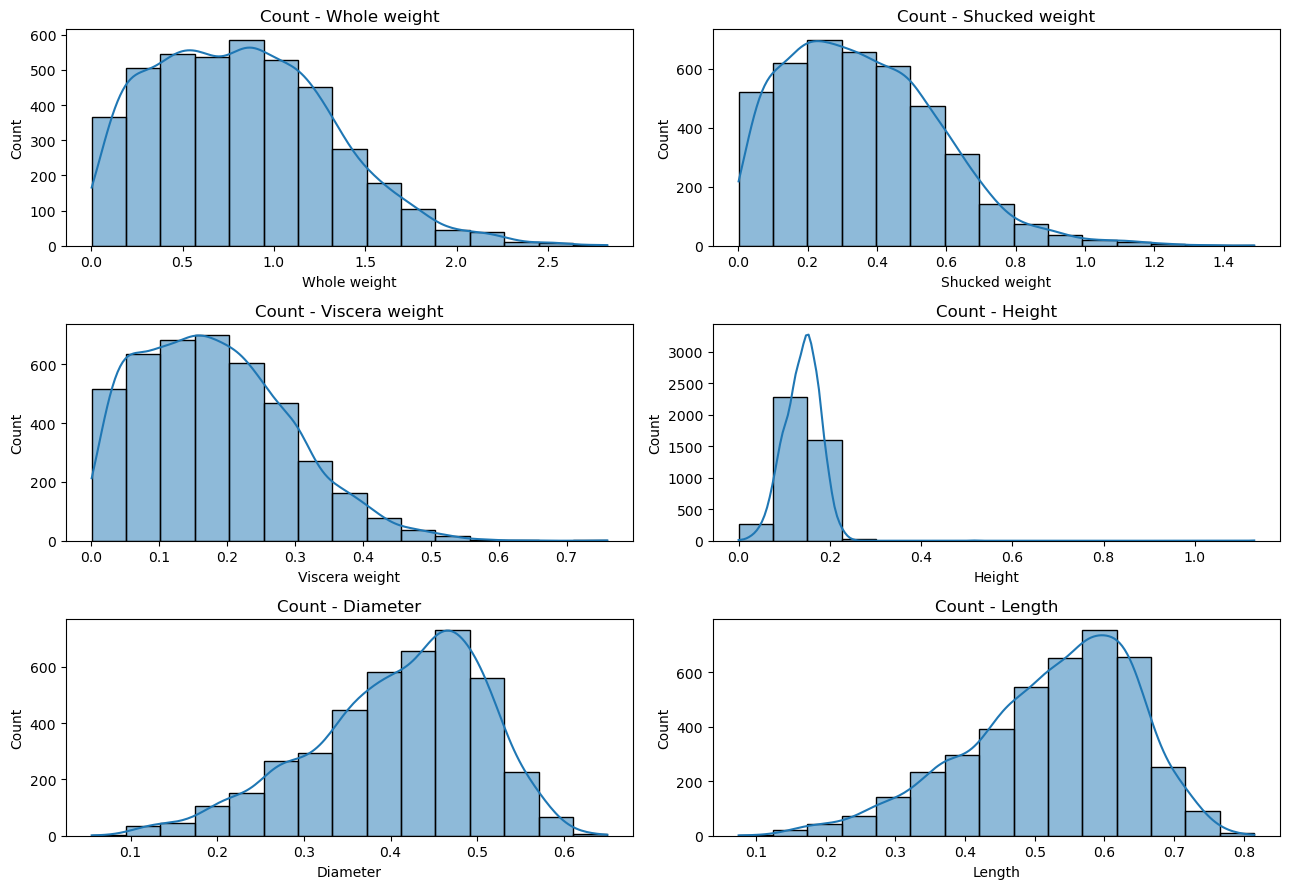

In [5]:
plt.figure(figsize=(13, 9))

plt.subplot(3, 2, 1)  # 3 rows, 2 columns, position
sns.histplot(df["Whole weight"],kde=True,bins=15)
plt.title('Count - Whole weight')

plt.subplot(3, 2, 2)  
sns.histplot(df["Shucked weight"],kde=True,bins=15)
plt.title('Count - Shucked weight')

plt.subplot(3, 2, 3) 
sns.histplot(df["Viscera weight"],kde=True,bins=15)
plt.title('Count - Viscera weight')

plt.subplot(3, 2, 4)  
sns.histplot(df["Height"],kde=True,bins=15)
plt.title('Count - Height')

plt.subplot(3, 2, 5)  
sns.histplot(df["Diameter"],kde=True,bins=15)
plt.title('Count - Diameter')

plt.subplot(3, 2, 6)  
sns.histplot(df["Length"],kde=True,bins=15)
plt.title('Count - Length')


plt.tight_layout()
plt.show()

# *****************************************************************************************

# *** TRAIN TEST SPLIT & PREDICTION for UNIVARIATE ***

In [56]:
from sklearn.model_selection import train_test_split

x = df[["Shell weight"]]
y = df["Rings"]

x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y, train_size = 0.75, random_state = 0)
x5 = x_train2.values
y5 = y_train2.values

regressor.fit(x5,y5)

LinearRegression()

In [58]:
# UNIVARIENT INPUT

x3 = [[0.70000]]
predicted = regressor.predict(x3)
predicted

array([16.56337599])

# *** TRAIN TEST SPLIT & PREDICTION for MULTIVARIATE ***

In [59]:
# divide dataset into training set(75%) and testing set(25%)

from sklearn.model_selection import train_test_split

x = df.drop('Rings', axis=1)
y = df['Rings']
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75, random_state = 0)

print("Shape of data : ", df.shape)
print("x_train shape : " , x_train.shape)
print("x_test shape : ", x_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

Shape of data :  (4177, 9)
x_train shape :  (3132, 8)
x_test shape :  (1045, 8)
y_train shape :  (3132,)
y_test shape :  (1045,)


In [60]:
#x = x.reshape(4177,1)
x = x_train.values
y = y_train.values
regressor.fit(x,y)

LinearRegression()

In [61]:
# MULTI VARIENT INPUT & PREDICTION

x2 = [[1,0.350,0.265,0.09000,0.2255,0.0995,0.0485,0.070000]]
predicted = regressor.predict(x2)
predicted

array([7.64161733])

# *PREDICT VALUES*

In [62]:
x1 = x_test.values
y1 = y_test.values

predicted = regressor.predict(x1)
predicted

array([12.99979696,  9.19834966, 10.12899683, ...,  9.9898647 ,
       12.38345551, 12.53397483])

# *PREDICT VALUES*

In [46]:
table = pd.DataFrame({
      'actual' : y_test,
      'predicted' : predicted
})
table

,actual,predicted
668,13,12.999797
1580,8,9.198350
3784,11,10.128997
463,5,5.596712
2615,12,10.429607
...,...,...
1420,11,11.790612
2104,11,10.053743
3382,15,9.989865
3424,10,12.383456


# * REGRESSOR INTERCEPT      &     ................................................
# ..........................................................REGRESSOR COEFFICIENT * 

In [47]:
print('Regressor intercept : \n\t',regressor.intercept_)
print('Regressor coefficient : \n\t',regressor.coef_)

Regressor intercept : 
	 4.133932926120482
Regressor coefficient : 
	 [ -0.30243639   0.31005673  10.61472182   7.79817201   9.04335203
 -19.9402225  -10.6548204    9.26284596]


# *MEAN ABSOLUTE ERROR*

In [49]:
mae = np.mean(abs(y1 - predicted))
print('MAE using formula  = ',mae)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y1, predicted)
print('MAE using function = ',mae)

print("y1 shape:", y1.shape)
print("predicted shape:", predicted.shape)

MAE using formula  =  1.5795918163186828
MAE using function =  1.5795918163186828
y1 shape: (1045,)
predicted shape: (1045,)


# *MEAN SQUARED ERROR*

In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y1, predicted)
print('MSE = ',mse)

MSE =  4.781640203092779


# *R2 SCORE*

In [20]:
from sklearn.metrics import r2_score
print(r2_score(y1, predicted))
print(regressor.score(x1,y1))

0.5449534804729512
0.5449534804729512


C:\Users\thite\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# summary

In [21]:
print("Mean Squared Error  : " , mean_squared_error(y1,predicted) )
print()

print("Root Mean Squared Error  : " , np.sqrt(mean_squared_error(y1,predicted)) )
print()

print("Mean Absolute Error  : " , mean_absolute_error(y1,predicted) )
print()

print("Coefficient of determination : ", r2_score(y1,predicted) )
print()

Mean Squared Error  :  4.781640203092779

Root Mean Squared Error  :  2.18669618445105

Mean Absolute Error  :  1.572294744887237

Coefficient of determination :  0.5449534804729512



# *** *LINEAR REGRESSION GRAPH* ***

C:\Users\thite\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Linear Regression Model Visualization')

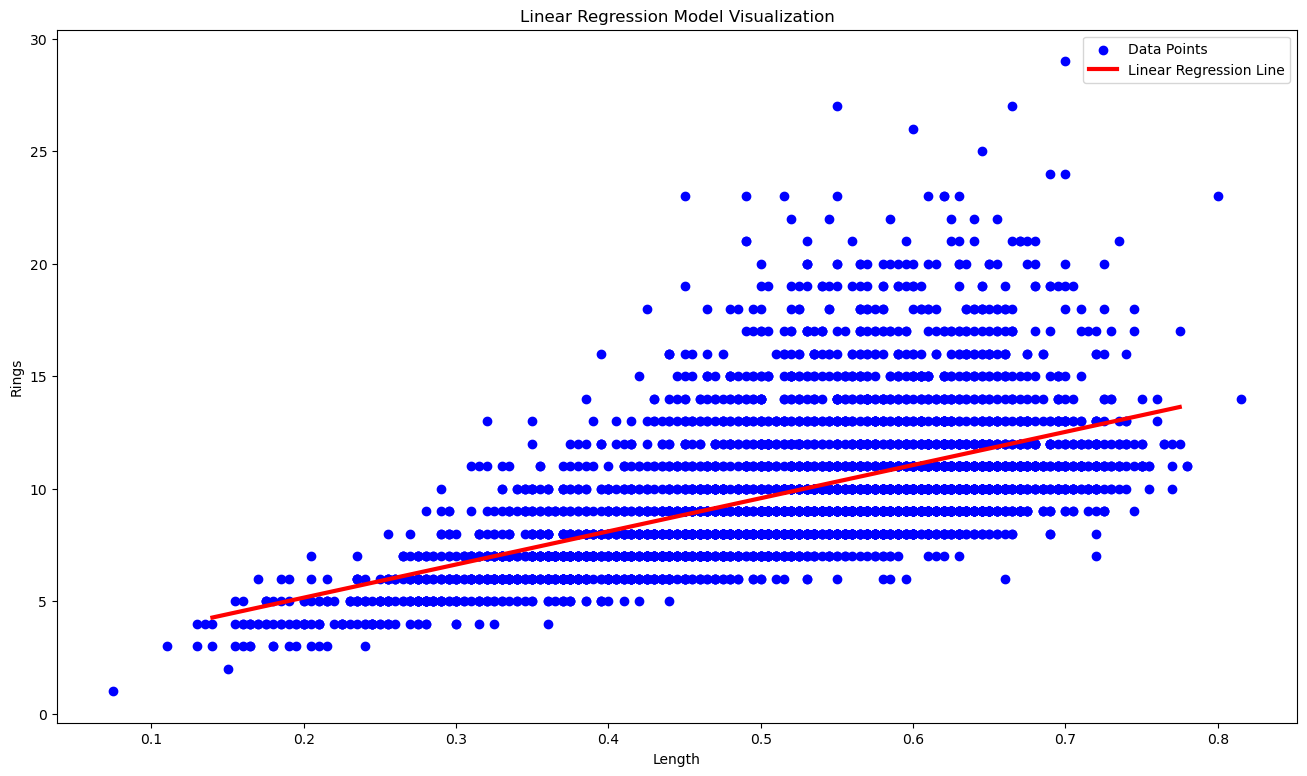

In [63]:
x = df[["Length"]]
y = df["Rings"]

x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y, train_size = 0.75, random_state = 0)
x5 = x_train2.values
y5 = y_train2.values
regressor.fit(x5,y5)

predicted = regressor.predict(x_test2)

plt.figure(figsize=(16,9))
plt.scatter(df['Length'], df['Rings'], color='blue', label='Data Points')
# plt.plot(x_train, predicted, color='red', linewidth=1, label='Linear Regression Model')
sns.lineplot(x=x_test2['Length'], y=predicted, color='red', linewidth=3, label='Linear Regression Line')
plt.xlabel('Length')
plt.ylabel('Rings')
plt.title('Linear Regression Model Visualization')
#plt.legend()
#plt.show()